In [25]:
# (3 pkt.)

# Import pyplot  Matplotlib jako plt
import matplotlib.pyplot as plt

# Import pandas jako 'pd'
import pandas as pd

# Import NumPy jako 'np'
import numpy as np

In [26]:
# (10 pkt.)

# Znajdź w sieci przykładowy zbiór uczący - minimum 5 tys próbek
# (2 klasy [0 lub 1 - jeśli są inne w zbiorze np. prawda / fałsz - prosze je pomienić na liczby], cechy liczbowe)
# oraz załaduj dane do pandas za pomocą funkcji read_cdv

data = pd.read_csv("heart.csv")
# data.shape

# Wyprintuj kilka pierwszych wierszy, dla sprawdzenia poprawności
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [27]:
# (3 pkt.)

# Podziel dane na cechy i klasy - metodą na wyciąganie poszczególnych danych z pandasowych DataFrame

# Zbiór cech (dane wejściowe)
X = data.drop("target", axis=1)

# Zbiór klas (kolumna z klas)
y = data["target"]

In [28]:
# (3 pkt.)

# Import train_test_split z sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Uzyj train_test_split aby rozdzielic X & y na zbiór uczący i testowy - dokumentacja
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
# (4 pkt.)

# Sprawdź "shape" (pandas) poszczególnych wszystkich utworzonych podzbiorów - wpisz w komentarzu, dlaczego dane mają takie wymiary
(
    X_train.shape,  # 80% danych uczących (dane wejściowe)
    X_test.shape,  # 20% danych testowych (dane wejściowe)
    y_train.shape,  # 80% danych uczących (dane wyjściowe)
    y_test.shape,  # 20% danych testowych (dane wyjściowe)
)

((820, 13), (205, 13), (820,), (205,))



### 2. Przygotowujemy model ML

In [30]:
# (2 pkt.)

# Import RandomForestClassifier z sklearn's ensemble
from sklearn.ensemble import RandomForestClassifier

# Utwórz instancję RandomForestClassifier do zmiennej clf
clf = RandomForestClassifier()



### 3. Trenujemy model i dokonujemy predykcji


In [31]:
# (1 pkt.)
# Czas na naukę modelu! fit dokonujemy na zbiorze uczącym - na cechach oraz klasach
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# (2 pkt.)

# Teraz na wytrenowanym modelu mozemy dokonać juz predykcji - oczywiscie na zbiorze testowym
y_preds = clf.predict(X_test)

### 4. Ewaluacja modelu


In [33]:
# (1 pkt.)

# Za pomocą funkcji score() dokonaj ewaluacji wytrenowanego modelu na danych uczących
clf.score(X_train, y_train)

1.0

In [34]:
# (1 pkt.)

# Za pomocą funkcji score dokonaj ewaluacji wytrenowanego modelu na danych testowych
clf.score(X_test, y_test)

0.9853658536585366

Trenowanie zbioru za pomocą róznych modeli - poszukujemy najlepszego!

In [35]:
# (5 pkt.)

# Import LinearSVC z sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier z sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC z sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression z sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# RandomForestClassifier - juz zainstalowalismy wczesniej

In [36]:
# (3pkt.)

# Podpowiedź!
# example = {"RandomForestClassifier": RandomForestClassifier()}

# Tworzymy Pythonowy słownik, który zawiera nazwę modelu oraz jego instancję

models = {
    "LinearSVC": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
}

# Stwórz pusty słownik, aby później móc dla poszczególnego modelu przechowywać jego skuteczność
results = dict()

In [37]:
# (10 pkt.)

# Iterując po wyzej stworzonym słowniku, wytrenuj kazdy model na wcześniej utworzonych danych,
# a następnie do nowego słownika zapisz jego skuteczność (funkcja score)

for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = model.score(X_test, y_test)


# Wyprintuj nowo utworzony słownik, aby zobaczyć skuteczność
results

/home/mroso/.local/share/virtualenv/jupyter/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/mroso/.local/share/virtualenv/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7902439024390244,
 'KNN': 0.7317073170731707,
 'SVC': 0.6829268292682927,
 'LogisticRegression': 0.7853658536585366,
 'RandomForestClassifier': 0.9853658536585366}

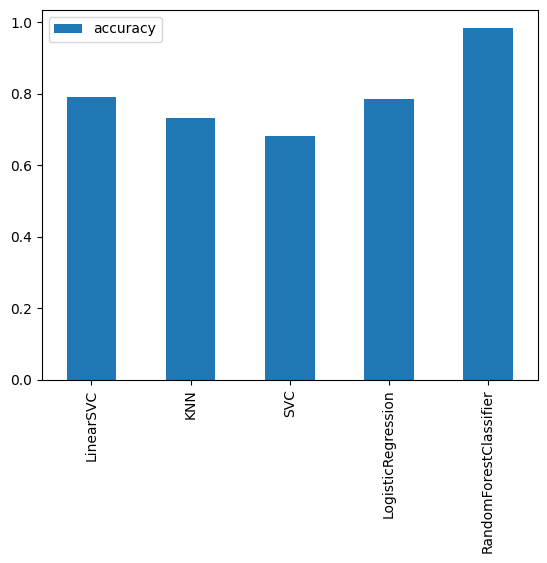

In [38]:
# (5 pkt.)

# Zapisz wyniki z nowo utworzonego słownika skuteczności modeli do Pandasa
results_df = pd.DataFrame(results, index=["accuracy"])

# Utwórz wykres (bar plot) aby zwizualizować skuteczność modeli - wskazówka -> plot.bar()
results_df.T.plot.bar();


Metryki:

* Confusion Matrix - Porównuje nadane klasy z klasami pochodzącymi z predykcji
* Cross-validation - Dzieleli zbiór na rózne podzbiry, nastepnie na nich trenuje i robi predykcje uśredniając skuteczność modelu. 
* Precision -  Proporcja true positives w stosunku do liczby wszystkich próbek. Wyzsze precision to mniej false positives.
* Recall -  Proporcja true positives do true positives + false positives. Wyzsze recall to mniej false negatives.
* F1 score - Łączy precision oraz recall w jedną metrykę metric. 1 - najlepiej, 0 - najgorzej.
* Classification report - Wbudowana funkcja scikit-learn `classification_report()` ktora zwraca wyzej wymienione metryki.


In [39]:
# (3 pkt.)

# Import confusion_matrix i classification_report z sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score i f1_score z sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve z sklearn's metrics module
from sklearn.metrics import plot_roc_curve

In [47]:
# (2 pkt.)

# Na najlepszym modelu dokonaj predykcji na zbiorze testowym i wyniki predykcji zapisz do zmiennej
best_model = models[max(results.items(), key=lambda m: m[1])[0]]
best_predicts = best_model.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [41]:
# (2 pkt.)

# Znajdź precision uywając precision_score()
precision_score(y_test, best_predicts)

1.0

In [42]:
# (2 pkt.)

# Znajdź recall score
recall_score(y_test, best_predicts)

0.970873786407767

In [43]:
# (2 pkt.)

# Znajdź  F1 score
f1_score(y_test, best_predicts)

0.9852216748768473

### Export i Import modelu


In [44]:
# (1 pkt.)

# Import  dump oraz load z joblib library
from joblib import dump, load

In [45]:
# (2 pkt.)

# Uzyj dump aby zapisac model do pliku
dump(best_model, "model.joblib")

['model.joblib']

In [46]:
# (2 pkt.)

# Zaladuj model z pliku oraz dokonaj na nim predykcji ponownie ze zbiore testowego
load("model.joblib").predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])